# Model Development

## Objective
#### After completig this lab you will be able to:
* Develop prediction models

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
path = '/Users/robertocandelario/DataGripProjects/Data analysis with python/House Rent Prediction Dataset (kaggle)/House_Rent_Dataset(3).csv'

In [170]:
df = pd.read_csv(path)

In [171]:
df.head()

,Unnamed: 0,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor level,Total floors,rent_norm,size_norm
0,0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1.0,2.0,0.002857,0.13750
1,1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3.0,3.0,0.005714,0.10000
2,2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3.0,3.0,0.004857,0.12500
3,3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2.0,2.0,0.002857,0.10000
4,4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2.0,2.0,0.002143,0.10625


In [172]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [173]:
df.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor level,Total floors,rent_norm,size_norm
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1.0,2.0,0.002857,0.13750
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3.0,3.0,0.005714,0.10000
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3.0,3.0,0.004857,0.12500
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2.0,2.0,0.002857,0.10000
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2.0,2.0,0.002143,0.10625


# 1. Linear Regression and Multiple Linear Regression
* The Predictor/independent variable(x)
* The response/dependent variable (that we want to predict)(y)
* The Result of linear regressionn is a linear function that predicts the response(dependent) variable as a function of the predictor

In [174]:
# Load the modules for linear regressionin:
from sklearn.linear_model import LinearRegression

In [175]:
# Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [176]:
x = df[['Bathroom']]
y = df[['Rent']]

In [177]:
lm.fit(x,y)

LinearRegression()

In [178]:
Yhat = lm.predict(x)
Yhat[0:5]

array([[36332.37055749],
       [-2656.33244648],
       [-2656.33244648],
       [-2656.33244648],
       [-2656.33244648]])

In [179]:
# What is the intercept
lm.intercept_

array([-41645.03545045])

In [180]:
# What is the slop
lm.coef_

array([[38988.70300397]])

# Multiple Linear Regression

In [181]:
z = df[['BHK', 'Size', 'Bathroom', 'Floor level', 'Total floors']]

##### Fit the linear model using the 5 above mentioned variables

In [182]:
lm.fit(z, df['Rent'])

LinearRegression()

In [183]:
lm.predict(z)

array([ 28162.20405199,   7523.37633991,  13368.03851723, ...,
        70769.13656942, 105250.39288489,  33262.72688259])

# 2. Model Evaluation using Visualization
### Now that we've develped some models, how do we evaluate our models and chose the best one? One way to do this is by using a visualizaiton.

In [184]:
# Import the visualization package seaborn:
import seaborn as sns
%matplotlib inline

#### Regression plot
##### WHen it comes to simple linnear regression, an excellent way to visualize the fit of our model is by using regression plots.
##### This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. Thiis will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation)

(0.0, 3675284.0344240456)

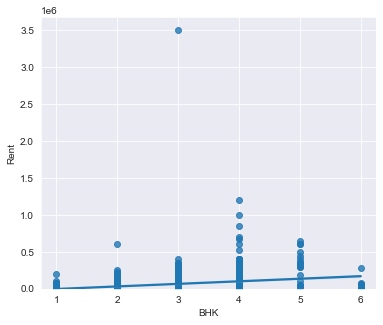

In [185]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x='BHK', y='Rent', data=df)
plt.ylim(0,)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

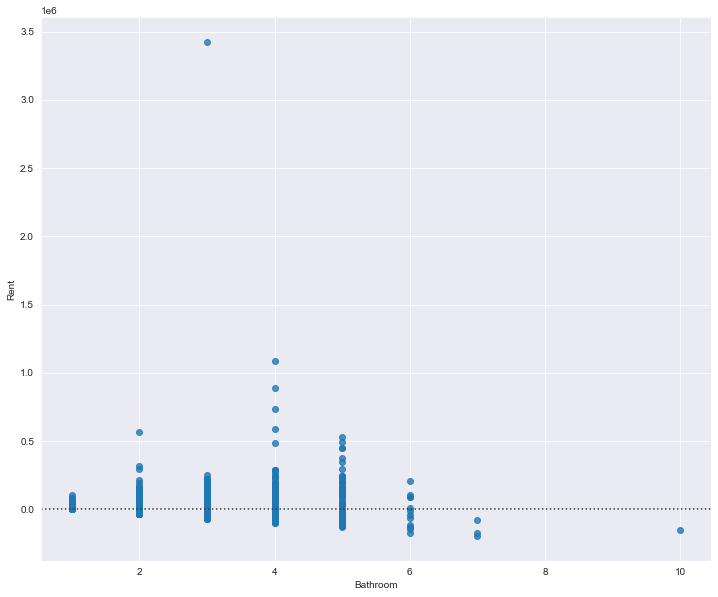

In [186]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['Bathroom'], df['Rent'])
plt.show

In [187]:
# Multiple Linear Regression

# How do we visualize a model for multiple linear regressiion? This gets a bit more complicated because you can't visualize it with regression or residual plot

# one way to look at the fit of the model is by lookinng at the distribution plot. We can look at the distriibution of the fitted values that result form the model and compare it to the distribution of the actual values.

# First, let's make a prediction:

In [188]:
y_hat = lm.predict(z)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


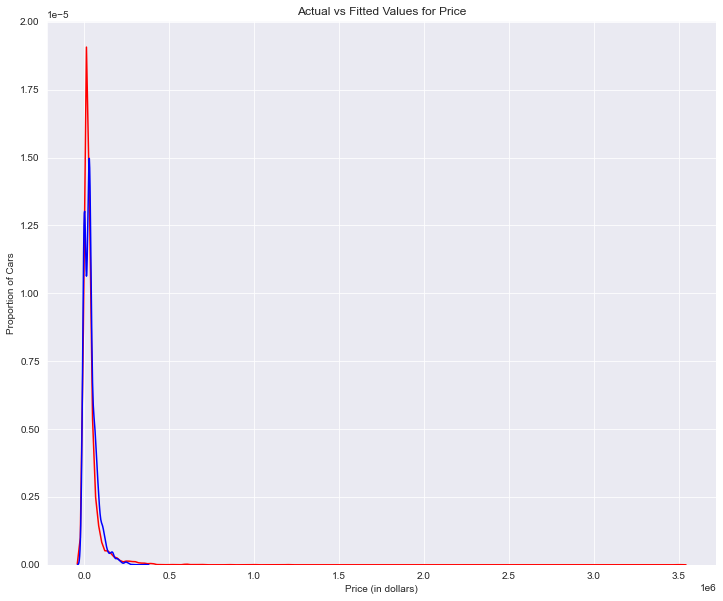

In [189]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['Rent'], hist=False, color='r', label= 'Actual value')
sns.distplot(y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [143]:
# WE ca see that the fitted values are reasonably close to the actual values since th two distributions overlap a bit. However, theere is definitely some room for improvement.

# 3. Polynomial Regression and Piplines

In [190]:
def PlotPolly(model, independet_variable, dependennt_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)

    plt.plot(independet_variable, dependennt_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Rent ')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Rent')

    plt.show()
    plt.close()

In [191]:
# Let's get the vaiables:
x = df['Bathroom']
y = df['Rent']

In [192]:
#Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
#Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3             2
-2887 x + 3.648e+04 x - 7.796e+04 x + 5.655e+04


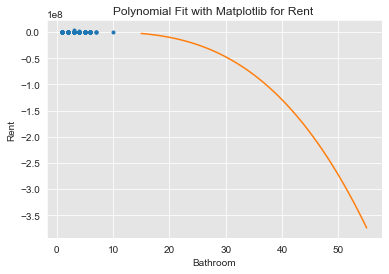

In [193]:
# Let's plot the function
PlotPolly(p, x, y, 'Bathroom')

       3             2
-2887 x + 3.648e+04 x - 7.796e+04 x + 5.655e+04


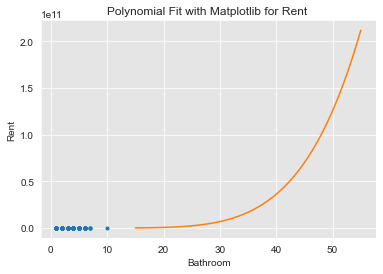

In [194]:
# Create a mor polynnomial model with the variables x and y from above
f1 = np.polyfit(x, y, 5)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1, x, y, 'Bathroom')

In [195]:
# We can perfomr a polynomial transform on multiple features. First we import the module:
from sklearn.preprocessing import PolynomialFeatures

In [196]:
# We create a polynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [197]:
Z_pr = pr.fit_transform(z)

In [198]:
# This will show us the number of samples and features we have
z.shape

(4742, 5)

In [199]:
# After the transformation there are 4742 samples and 21 features
Z_pr.shape

(4742, 21)

# Pipeline

Data pipeline sssimplify the steps of processingn the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

##### We create the pipeline by creating a list of tuples including the name of the model or estimator and its correspondig construction

In [201]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias= False)), ('model', LinearRegression())]

In [202]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [203]:
Z = z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [204]:
# Similarly, we can normalize the data, perform a trannsform and produce a prediction simultaneously.
ypipe = pipe.predict(Z)
ypipe[0:4]

array([17000.50381554,  5076.60899847,  6447.32513227,  2757.13873326])

# Model 1: Simple Linear Regresssion

In [205]:
# Let's calculate the R^2:
# Bathroom fit
lm.fit(x,y)
# Find the R^2
print('The R-Squared is: ', lm.score(x,y))

ValueError: Expected 2D array, got 1D array instead:
array=[2 1 1 ... 3 2 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Model 2: Multiple Liear Regression
Let's calculat the R^2:

In [207]:
# fit the model
lm.fit(Z, df['Rent'])
# Find the r^2
print('The R-Squared is: ', lm.score(Z,y))

The R-Squared is:  0.2626453077046381


# LET'S calculate the MSE.

In [210]:
# Let's import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

# We produce a prediction:
Y_predict_multifit = lm.predict(Z)

In [212]:
# We compare the predicted results with the actual results:
print('Th mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['Rent'], Y_predict_multifit))

Th mean square error of price and predicted value using multifit is:  4500956184.665299


In [213]:
# Model 3: polynomial Fit

from sklearn.metrics import r2_score

In [214]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.2395480045044457


In [215]:
# we can also calculate the MSE:
mean_squared_error(df['Rent'], p(x))

4641946607.285886